# Exercise Sheet 02: Principal Component Analysis, Factor Analysis, K-Means, and Gaussian Mixture Models

**Introduction to Data Mining WS23/24**  
**Bielefeld University**  
**Alina Deriyeva, Benjamin Paaßen**  
**Exercise Sheet Publication Date: 2023-11-06**  
**Exercise Sheet Submission Deadline: Friday, 2023-11-17, noon (i.e. 12:00), via Moodle.**

**NOTE** The use of language models/AI tools is permitted IF you notify us of the use (just indicate it in the respective task) and are still able to understand and present your results. We also appreciate it if you link to a chatlog of the interaction with the language model/AI tool so that we can understand better how students tend to use these tools.

**PLEASE INDICATE ALL AUTHORS OF THE SUBMISSION IN THIS FIELD**

Malte Böttcher & Mikey Hiddemann

## Preamble: Data set

The file `sheet02_data.csv` contains fictional data as you might find in an online course. Each row represents a student, each column a feature of the student's activity in the course, namely their number of posts in the course discussion forum, the number of questions they asked in chat during the online lectures, the number of messages they sent to their peers, and the number of points they achieved in each of the five exercises of the course.

Note that there is quite a bit of missing data for later exercises because many students dropped out of the course early.

The following line loads this raw data and prints it.

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.decomposition
import sklearn.cluster
import sklearn.mixture
import math

features = ['num_forum_postings',
    'num_questions',
    'num_messages',
    'num_completed_tasks',
    'points_exercise_1',
    'points_exercise_2',
    'points_exercise_3',
    'points_exercise_4',
    'points_exercise_5']

X = np.loadtxt('sheet02_data.csv', skiprows = 1, delimiter = '\t')
print(X)

[[ 3.  1.  1. ... 56. 61. 60.]
 [ 0.  0.  0. ... nan nan nan]
 [ 7.  3.  2. ... 66. 57. nan]
 ...
 [ 0.  0.  0. ... 30. nan nan]
 [ 1.  0.  0. ... nan nan nan]
 [ 3.  0.  1. ... 40. 35. 40.]]


### Task 02.01

Our first challenge is to impute the missing data. Fill in missing values with the mean points the respective student got on the other exercises. For students with no completed exercises, fill in zeros.

In [31]:
# YOUR CODE HERE
for student in X:
    mean_score = np.nanmean(student[4:])
    student[np.isnan(student)] = mean_score if not math.isnan(mean_score) else 0
print(X)


[[ 3.          1.          1.         ... 56.         61.
  60.        ]
 [ 0.          0.          0.         ... 24.5        24.5
  24.5       ]
 [ 7.          3.          2.         ... 66.         57.
  60.75      ]
 ...
 [ 0.          0.          0.         ... 30.         30.66666667
  30.66666667]
 [ 1.          0.          0.         ... 13.         13.
  13.        ]
 [ 3.          0.          1.         ... 40.         35.
  40.        ]]


C:\Users\Malte\AppData\Local\Temp\ipykernel_11012\3020448441.py:3: RuntimeWarning: Mean of empty slice
  mean_score = np.nanmean(student[4:])


In [32]:
# this cell is here for test purposes. please ignore it. 

### Task 02.02

Next, normalize the data by dividing by the maximum value in each column.

In [72]:
# YOUR CODE HERE
max_values = np.max(X, axis=0)
print(max_values)

normalized_data = X / max_values
print(normalized_data)

[12.  5.  9.  5. nan nan nan nan nan]
[[0.25       0.2        0.11111111 ...        nan        nan        nan]
 [0.         0.         0.         ...        nan        nan        nan]
 [0.58333333 0.6        0.22222222 ...        nan        nan        nan]
 ...
 [0.         0.         0.         ...        nan        nan        nan]
 [0.08333333 0.         0.         ...        nan        nan        nan]
 [0.25       0.         0.11111111 ...        nan        nan        nan]]


In [34]:
# this cell is here for test purposes. please ignore it. 

## Principal Component Analysis

### Task 02.03

Compute the covariance matrix of the data via `np.cov` and compute the eigenvalues of the covariance matrix via `np.linalg.eigvals`. Provide a plot of the eigenvalues on the y-axis, sorted according to size (the largest eigenvalue at x=1, the second-largest on x=2, and so on).

Compute and report the percentage of variance covered by the first two eigenvalues.

**HINT:** `np.cov` treats the rows as variables and columns as observations. For our data set, rows are observations and columns are variables.

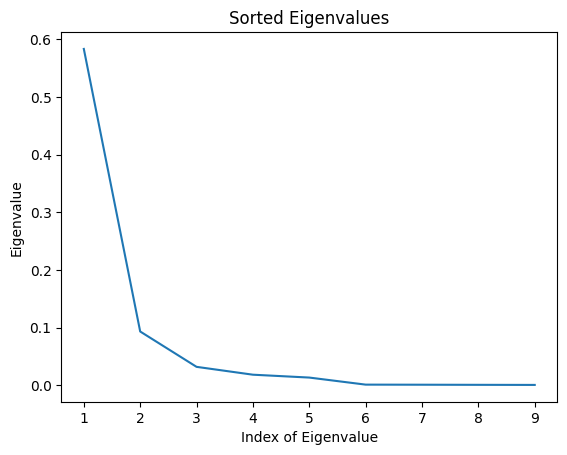

Percentage covered by the first two eigenvalues: 90.8985056565581


In [35]:
# YOUR CODE HERE
cov = np.cov(normalized_data, rowvar=False)
eigenval = np.linalg.eigvals(cov)

eigenval_sorted = np.sort(eigenval)[::-1]

plt.plot(range(1, len(eigenval_sorted) + 1), eigenval_sorted)
plt.xlabel("Index of Eigenvalue")
plt.ylabel("Eigenvalue")
plt.title("Sorted Eigenvalues")
plt.show()

variance_percentage = np.sum(eigenval_sorted[:2]) / np.sum(eigenval_sorted) * 100

print(f"Percentage covered by the first two eigenvalues: {variance_percentage}")

In [36]:
# this cell is here for test purposes. please ignore it. 

### Task 02.04

Use the `fit` method of a `sklearn.decomposition.PCA` model to perform a principal component analysis of this data with `n_components = 2`.

Transform the data to the latent space via the `transform` function of the PCA model.

Plot the data using a 2D scatter plot.

Text(0.5, 1.0, '2d scatter plot of PCA')

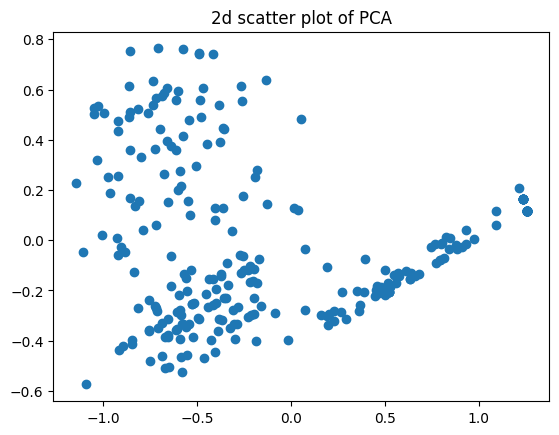

In [40]:
# YOUR CODE HERE
pca = sklearn.decomposition.PCA(n_components=2)

pca.fit(normalized_data)

transformed_data_pca = pca.transform(normalized_data)

plt.scatter(transformed_data_pca[:, 0], transformed_data_pca[:, 1])

plt.title("2d scatter plot of PCA")


In [38]:
# this cell is here for test purposes. please ignore it. 

### Task 02.05 (Bonus Task)

Compute the eigenvalue decomposition of the covariance matrix and perform PCA yourself. Only retain the two most prominent components and plot the transformed data with a 2D scatter plot. Check whether your plot is consistent with the plot above.

Text(0.5, 1.0, 'Manual PCA')

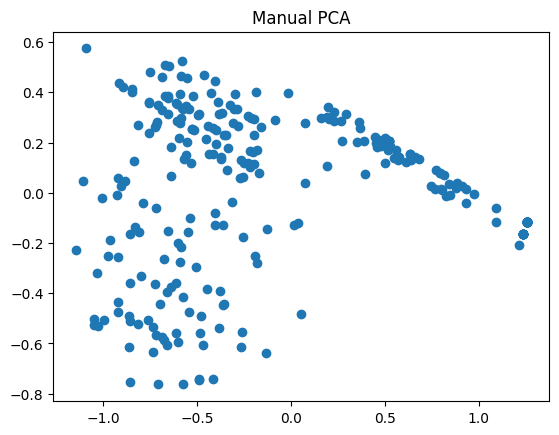

In [48]:
eigenvalues, eigenvectors = np.linalg.eig(cov)

normalized_data_centered = normalized_data - np.mean(normalized_data, axis=0)

sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

manual_pca = np.dot(normalized_data_centered, sorted_eigenvectors[:, :2])

plt.scatter(manual_pca[:, 0], manual_pca[:, 1])
plt.title('Manual PCA')


In [ ]:
# this cell is here for test purposes. please ignore it. 

## Factor Analysis

### Task 02.06

Use the `fit` method of a `sklearn.decomposition.FactorAnalysis` model to perform a factor analysis of this data with `n_components = 2`. Use the `rotation = 'varimax'` parameter.

Transform the data to the latent space via the `transform` function of the FA model.

Plot the data using a 2D scatter plot.

Compare this plot to the plot above. What difference do you notice?

Text(0.5, 1.0, '2d scatter plot of fa')

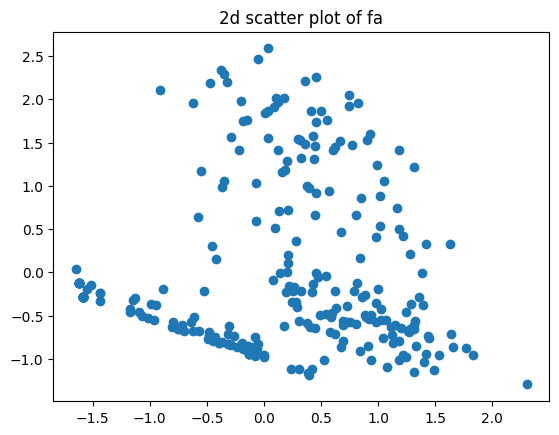

In [57]:
# YOUR CODE HERE
fa = sklearn.decomposition.FactorAnalysis(n_components=2, rotation = 'varimax')

fa.fit(normalized_data)

transformed_data_fa = fa.transform(normalized_data)

plt.scatter(transformed_data_fa[:, 0], transformed_data_fa[:, 1])

plt.title("2d scatter plot of fa")

In [ ]:
# this cell is here for test purposes. please ignore it. 

YOUR ANSWER HERE

The data seems to be very similar just rotated by a factor

### Task 02.07

Print the `components_` property of the factor analysis model. For both factors, report which features/columns of the data have high weights.

Try to interpret the 

Print the factors found by the factor analysis using `print(model.components_)`. Try to interpret both factors. What does the first factor represent? What does the second factor represent?

In [47]:
# YOUR CODE HERE
print(f"components of fa model {fa.components_}")

components of fa model [[0.11703187 0.09086351 0.0932999  0.33418737 0.27715195 0.2760629
  0.26329229 0.26347569 0.26832181]
 [0.21847961 0.19309129 0.17895348 0.11021114 0.05045514 0.04984632
  0.04727654 0.0480017  0.05404447]]


YOUR ANSWER HERE

## Clustering

### Task 02.08

Using `sklearn.cluster.KMeans`, perform cluster analyses of the data for `n_clusters` between 2 and 10. For each value of `n_clusters`, compute the `sklearn.metrics.silhouette_score`. Provide a plot of the silhouette score on the y axis and `n_clusters` on the x axis. Report which value for `n_clusters` is best according to this analysis.

**HINT:** The `silhouette_score` function requires the cluster labels as second argument. You can retrieve the cluster labels from a fitted `KMeans` model via the `predict` function.

C:\Users\Malte\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Malte\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Malte\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Malte\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\

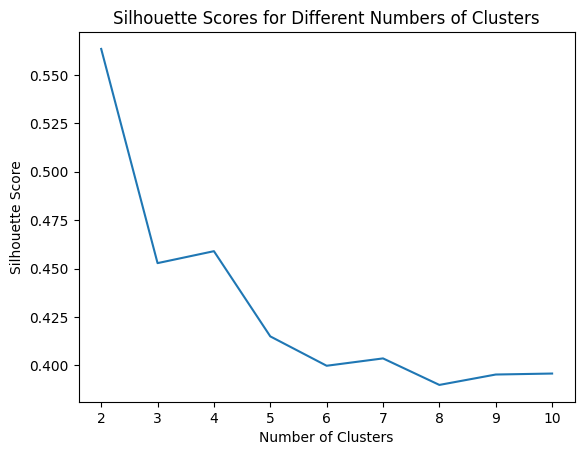

The best number of clusters according to silhouette score: 2


In [55]:
# YOUR CODE HERE
n_clusters = range(2, 11)

silhouette_scores = []

for n_cluster in n_clusters:
    kmeans = sklearn.cluster.KMeans(n_clusters=n_cluster)
    
    kmeans.fit(normalized_data)
    
    cluster_labels = kmeans.predict(normalized_data)
    
    silhouette_scores.append(sklearn.metrics.silhouette_score(normalized_data, cluster_labels))
    
plt.plot(n_clusters, silhouette_scores)
plt.title('Silhouette scores for different numbers of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()
    
best_n_clusters = n_clusters[np.argmax(silhouette_scores)]

print(f"The best number of clusters according to silhouette score: {best_n_clusters}")

In [ ]:
# this cell is here for test purposes. please ignore it. 

YOUR ANSWER HERE

### Task 02.09

Using `sklearn.cluster.KMeans`, perform a cluster analysis of the data with `n_clusters = 2`. Provide a scatter plot of the latent representation of the data according to factor analysis, where the color of each point represents the cluster membership.

C:\Users\Malte\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


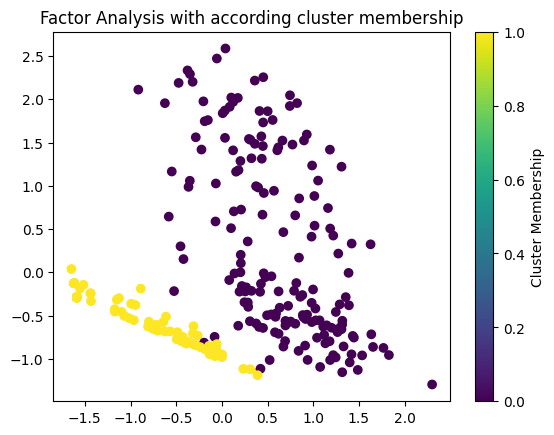

In [58]:
# YOUR CODE HERE
kmeans = sklearn.cluster.KMeans(n_clusters=2)

kmeans.fit(normalized_data)

cluster_labels = kmeans.predict(normalized_data)

scatter_plot = plt.scatter(transformed_data_fa[:, 0], transformed_data_fa[:, 1], c=cluster_labels)
plt.title("Factor Analysis with according cluster membership (kmeans normalized data)")
plt.colorbar(scatter_plot, label='Cluster membership')
plt.show()

In [ ]:
# this cell is here for test purposes. please ignore it. 

### Task 02.10 (bonus task)

Repeat the cluster analysis, but perform it on the latent representation according to factor analysis. Plot the new clustering. Check if it is consistent with the plot above.


C:\Users\Malte\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


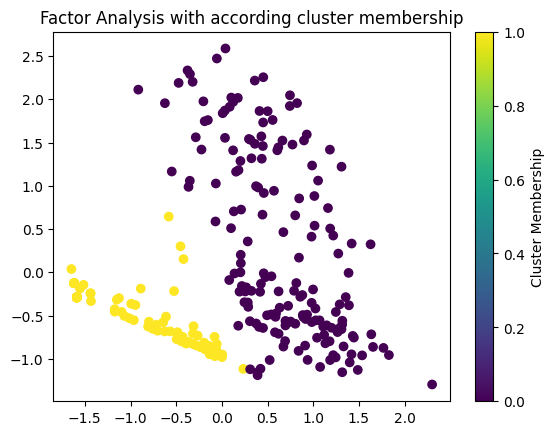

In [59]:
# YOUR CODE HERE
kmeans = sklearn.cluster.KMeans(n_clusters=2)

kmeans.fit(transformed_data_fa)

cluster_labels = kmeans.predict(transformed_data_fa)

scatter_plot = plt.scatter(transformed_data_fa[:, 0], transformed_data_fa[:, 1], c=cluster_labels)
plt.title("Factor Analysis with according cluster membership (kmeans fa data)")
plt.colorbar(scatter_plot, label='Cluster Membership')
plt.show()

In [ ]:
# this cell is here for test purposes. please ignore it. 

### Task 02.11 (bonus task)

Implement $K$-Means yourself. Check if your result is consistent with the result provided by the `sklearn` implementation.


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Gaussian Mixture Models

### Task 02.12

Using `sklearn.mixture.GaussianMixture`, perform cluster analyses of the data with `n_components` between 2 and 10. For each cluster analysis, compute the `bic` function value of the model (this is the Bayesian information criterion). Provide a plot of the bic value on the y axis with `n_components` on the x axis.

Report which value for `n_components` is best according to this analysis.

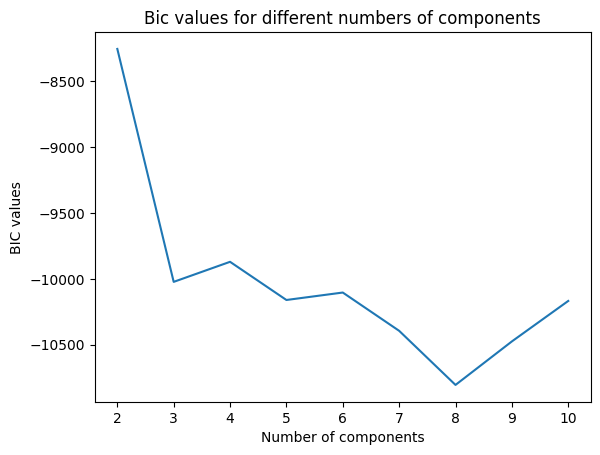

The best number of components according to big values: 2


In [66]:
# YOUR CODE HERE

bic_values = []
n_components = range(2, 11)

for n_component in n_components:
    gm = sklearn.mixture.GaussianMixture(n_components=n_component)
    
    gm.fit(normalized_data)
    
    bic_values.append(gm.bic(normalized_data))
    
plt.plot(n_clusters, bic_values)
plt.title('Bic values for different numbers of components')
plt.xlabel('Number of components')
plt.ylabel('BIC values')
plt.show()
    
best_n_components = n_components[np.argmax(bic_values)]

print(f"The best number of components according to big values: {best_n_components}")

In [ ]:
# this cell is here for test purposes. please ignore it. 

### Task 02.13

Using `sklearn.mixture.GaussianMixture`, perform a cluster analysis of the data with `n_components = 2`. Provide a scatter plot of the latent representation of the data according to factor analysis, where the color of each point represents the cluster membership.

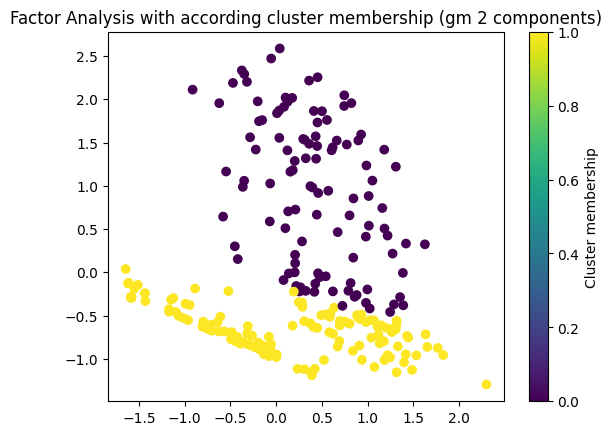

In [68]:
# YOUR CODE HERE
gm2 = sklearn.mixture.GaussianMixture(n_components=2)

gm2.fit(transformed_data_fa)

cluster_labels = gm2.predict(transformed_data_fa)

scatter_plot = plt.scatter(transformed_data_fa[:, 0], transformed_data_fa[:, 1], c=cluster_labels)
plt.title("Factor Analysis with according cluster membership (gm 2 components)")
plt.colorbar(scatter_plot, label='Cluster membership')
plt.show()

In [ ]:
# this cell is here for test purposes. please ignore it. 

### Task 02.14

Using `sklearn.mixture.GaussianMixture`, perform a cluster analysis of the latent space representation according to factor analysis with `n_components = 3`. Provide a scatter plot, where the color of each point represents the cluster membership.

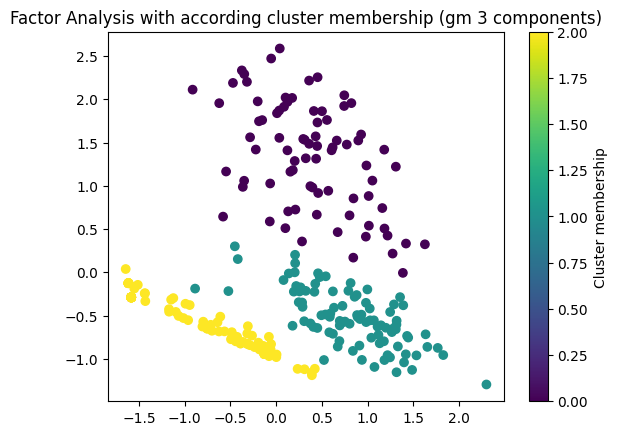

In [69]:
# YOUR CODE HERE
gm3 = sklearn.mixture.GaussianMixture(n_components=3)

gm3.fit(transformed_data_fa)

cluster_labels = gm3.predict(transformed_data_fa)

scatter_plot = plt.scatter(transformed_data_fa[:, 0], transformed_data_fa[:, 1], c=cluster_labels)
plt.title("Factor Analysis with according cluster membership (gm 3 components)")
plt.colorbar(scatter_plot, label='Cluster membership')
plt.show()

In [ ]:
# this cell is here for test purposes. please ignore it. 

### Task 02.15

Print the mean feature values for each cluster. Try to interpret the clusters: What are the mean differences between the clusters? How would you name each cluster?

In [75]:
# YOUR CODE HERE
clusters = range(0,3)

clustered_data = np.column_stack((normalized_data, cluster_labels))

mean_values_by_cluster = []
for cluster in clusters:
    data_in_cluster = clustered_data[clustered_data[:, -1] == cluster][:, :-1]
    mean_value = np.mean(data_in_cluster, axis=0)
    
    mean_values_by_cluster.append(mean_value)
    
for i, mean_values in enumerate(mean_values_by_cluster):
    print(f"Cluster {i+1} Mean Values:")
    for feature, mean_value in zip(features, mean_values):
        print(f"{feature}: {mean_value:.2f}")
    print("\n")
    

Cluster 1 Mean Values:
num_forum_postings: 0.63
num_questions: 0.52
num_messages: 0.50
num_completed_tasks: 0.95
points_exercise_1: nan
points_exercise_2: nan
points_exercise_3: nan
points_exercise_4: nan
points_exercise_5: nan


Cluster 2 Mean Values:
num_forum_postings: 0.21
num_questions: 0.12
num_messages: 0.16
num_completed_tasks: 1.00
points_exercise_1: nan
points_exercise_2: nan
points_exercise_3: nan
points_exercise_4: nan
points_exercise_5: nan


Cluster 3 Mean Values:
num_forum_postings: 0.02
num_questions: 0.00
num_messages: 0.00
num_completed_tasks: 0.24
points_exercise_1: nan
points_exercise_2: nan
points_exercise_3: nan
points_exercise_4: nan
points_exercise_5: nan


YOUR ANSWER HERE

### Task 02.16

Recall the equation for the expected negative log likelihood in a Gaussian mixture model from the lecture:

\begin{align*}
Q = &\sum_{i=1}^N \sum_{k=1}^K -\gamma_{k,i} \log\Big[ p_{X|Z}(x_i|k) \cdot p_Z(k) \Big]\\
=& \sum_{i=1}^N \sum_{k=1}^K \gamma_{k,i} \Big(\frac{1}{2}\log[2\pi \det(\Sigma_k)] + \frac{1}{2} (x_i - \mu_k)^T \Sigma_k^{-1} (x_i - \mu_k) - \log[p_Z(k)]\Big)
\end{align*}

Assuming that $Q$ is convex, find the optimal values for $\mu_k$ and $\Sigma_k$

**HINT:** You may use the following general matrix/vector gradient equations (refer to the [matrix cook book by Peterson and Pedersen (2012), p.10-11](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf) :
\begin{align*}
\nabla_x (x - y)^T W (x - y) &= 2 W (x-y) \\
\nabla_W (x - y)^T W (x - y) &= (x-y)(x-y)^T \\
\nabla_{W^{-1}} \log[\det(W)] &= -W & \text{if $W$ is symmetric and positive semi-definite}
\end{align*}

YOUR ANSWER HERE